# Imports

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Notes
- we used the GPT2 model
- we used the GPT2 tokenizer with this settings 
  - use_fast=True
  - add_prefix_space=False
- in this case we used only the tokens that are digits [0-9] for GPT2 and ASMR
- using the floatingPointPartitioner

# Loading data of samples of two digit length

In [4]:
#this samples had the prompt tokenizer.decode(tokenizer.bos_token_id)
outlines_data = pd.read_csv('../../csv/outlines/outlines_10k_length2.csv')
repeated_values_outlines = outlines_data['floating-point'].value_counts()
print(repeated_values_outlines)

floating-point
0.00    505
0.50    339
0.01    313
0.10    312
0.30    269
       ... 
0.79     26
0.77     26
0.96     24
0.97     21
0.37     18
Name: count, Length: 100, dtype: int64


In [5]:
#this samples were generated using the FloatingPointPartitioner
asmr_data = pd.read_csv('../../csv/asmr/asmr_10k_length2.csv')
repeated_values_asmr = asmr_data['floating-point'].value_counts()
print(repeated_values_asmr)

floating-point
0.51    790
0.52    508
0.50    434
0.11    391
0.53    317
       ... 
0.95     15
0.38     12
0.48     11
0.88      9
0.78      9
Name: count, Length: 100, dtype: int64


In [6]:
#this samples had the prompt tokenizer.decode(tokenizer.bos_token_id) + "."
llm_data = pd.read_csv('../../csv/llm/llm_10k_length2.csv')
repeated_values_llm = llm_data['floating-point'].value_counts()
print(repeated_values_llm)

floating-point
0.51    487
0.52    418
0.53    411
0.54    376
0.56    360
       ... 
0.60     22
0.40     21
0.70     21
0.90     16
0.80     15
Name: count, Length: 100, dtype: int64


# Plots

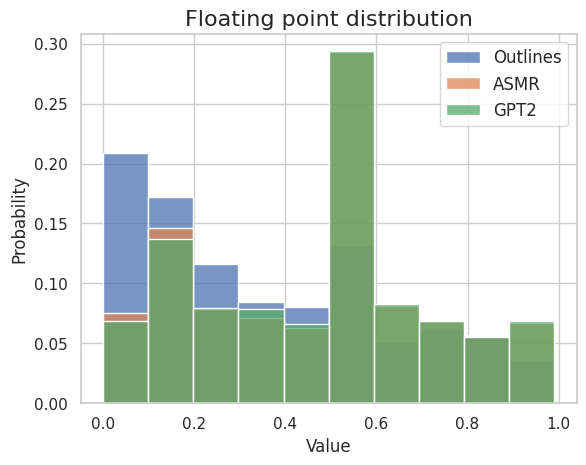

In [7]:
sns.set(style="whitegrid")

sns.histplot(outlines_data['floating-point'], bins=10, stat='probability', label='Outlines')
sns.histplot(asmr_data['floating-point'], bins=10, stat='probability', label='ASMR')
sns.histplot(llm_data['floating-point'], bins=10, stat='probability', label='GPT2')


plt.title('Floating point distribution', fontsize=16)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.legend(fontsize=12)

plt.show()


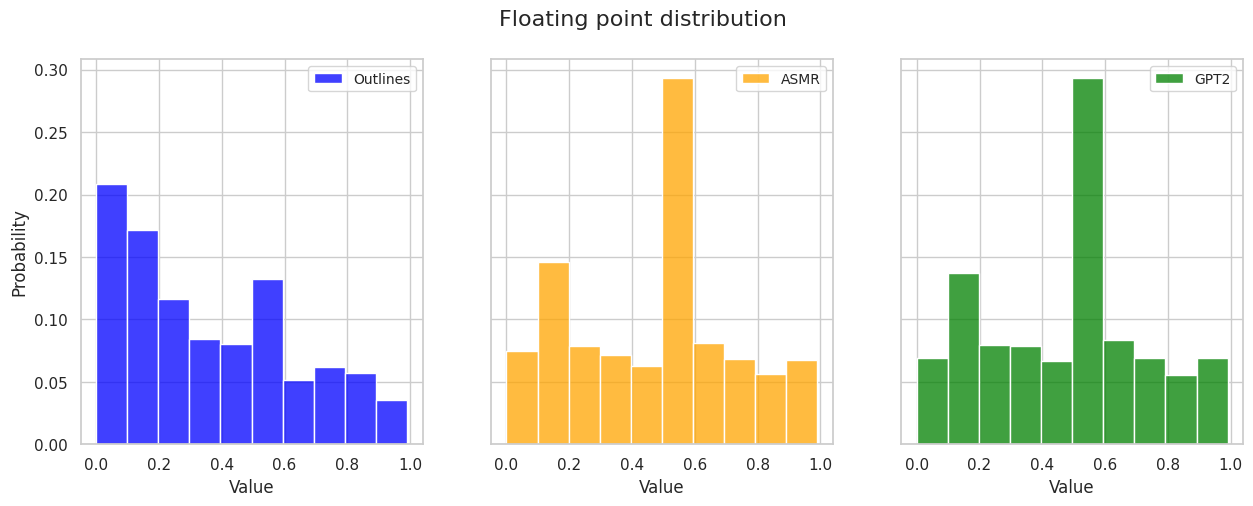

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

sns.histplot(outlines_data['floating-point'], bins=10, stat='probability', label='Outlines', ax=axs[0], color = 'blue')
sns.histplot(asmr_data['floating-point'], bins=10, stat='probability', label='ASMR', ax=axs[1], color='orange')
sns.histplot(llm_data['floating-point'], bins=10, stat='probability', label='GPT2', ax=axs[2], color='green')

fig.suptitle('Floating point distribution', fontsize=16)
for ax in axs:
    ax.set_xlabel('Value', fontsize=12)
    ax.set_ylabel('Probability', fontsize=12)
    ax.legend(fontsize=10)

plt.show()
